In [7]:
import os
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from healpix_plot import default_plot, get_listed_colormap
from healpix_functions import aggregate_grid_xarray
path = 'data'
figpath = 'figures_paper'

mpl.rc('font', **{'size': 8})
proj = ccrs.Mollweide()
cm = 1/2.54  # centimeters in inches

In [8]:
data_dict = {}
for index in ['rx1day', 'r10mm', 'cwd']:
    data_dict[index] = {}
    for model in ['ICON-ngc4008', 'IFS-9-FESOM-5-production']:
        da = xr.open_dataset(os.path.join(
            path, model, 'z9', f'{index}_ann_{model}_ssp370_zoom9.nc'))[index]
        data_dict[index][model] = aggregate_grid_xarray(da, z_out=6, method='std').mean('time')

In [11]:
levels_rx1day = [0, 5, 10, 15, 20, 40, 50, 60, 70, 80]
levels_r10mm = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 40, 60]
levels_cwd = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 40, 60]

kwargs_dict = dict(
    rx1day = dict(
        cmap=get_listed_colormap(levels_rx1day, 'magma_r', return_colors=True, white='first', extend='max'),
        levels=levels_rx1day, 
        extend='max',
    ),
    r10mm = dict(
        cmap=get_listed_colormap(levels_r10mm, 'magma_r', return_colors=True, white='first', extend='max'),
        levels=levels_r10mm, 
        extend='max',
    ),
    cwd = dict(
        cmap=get_listed_colormap(levels_cwd, 'magma_r', return_colors=True, white='first', extend='max'),
        levels=levels_cwd, 
        extend='max',
    ),
)

title_dict = {
    'rx1day': 'Annual maximum of daily precipitation (mm/day)',
    'r10mm': 'Annual count of days where precipitation exceeds 10mm (days)',
    'cwd': 'Annual maximum length of consecutive wet days (days)',
}

label_dict = {0: '(a)', 1: '(b)', 2: '(c)', 3: '(d)', 4: '(e)', 5: '(f)'}

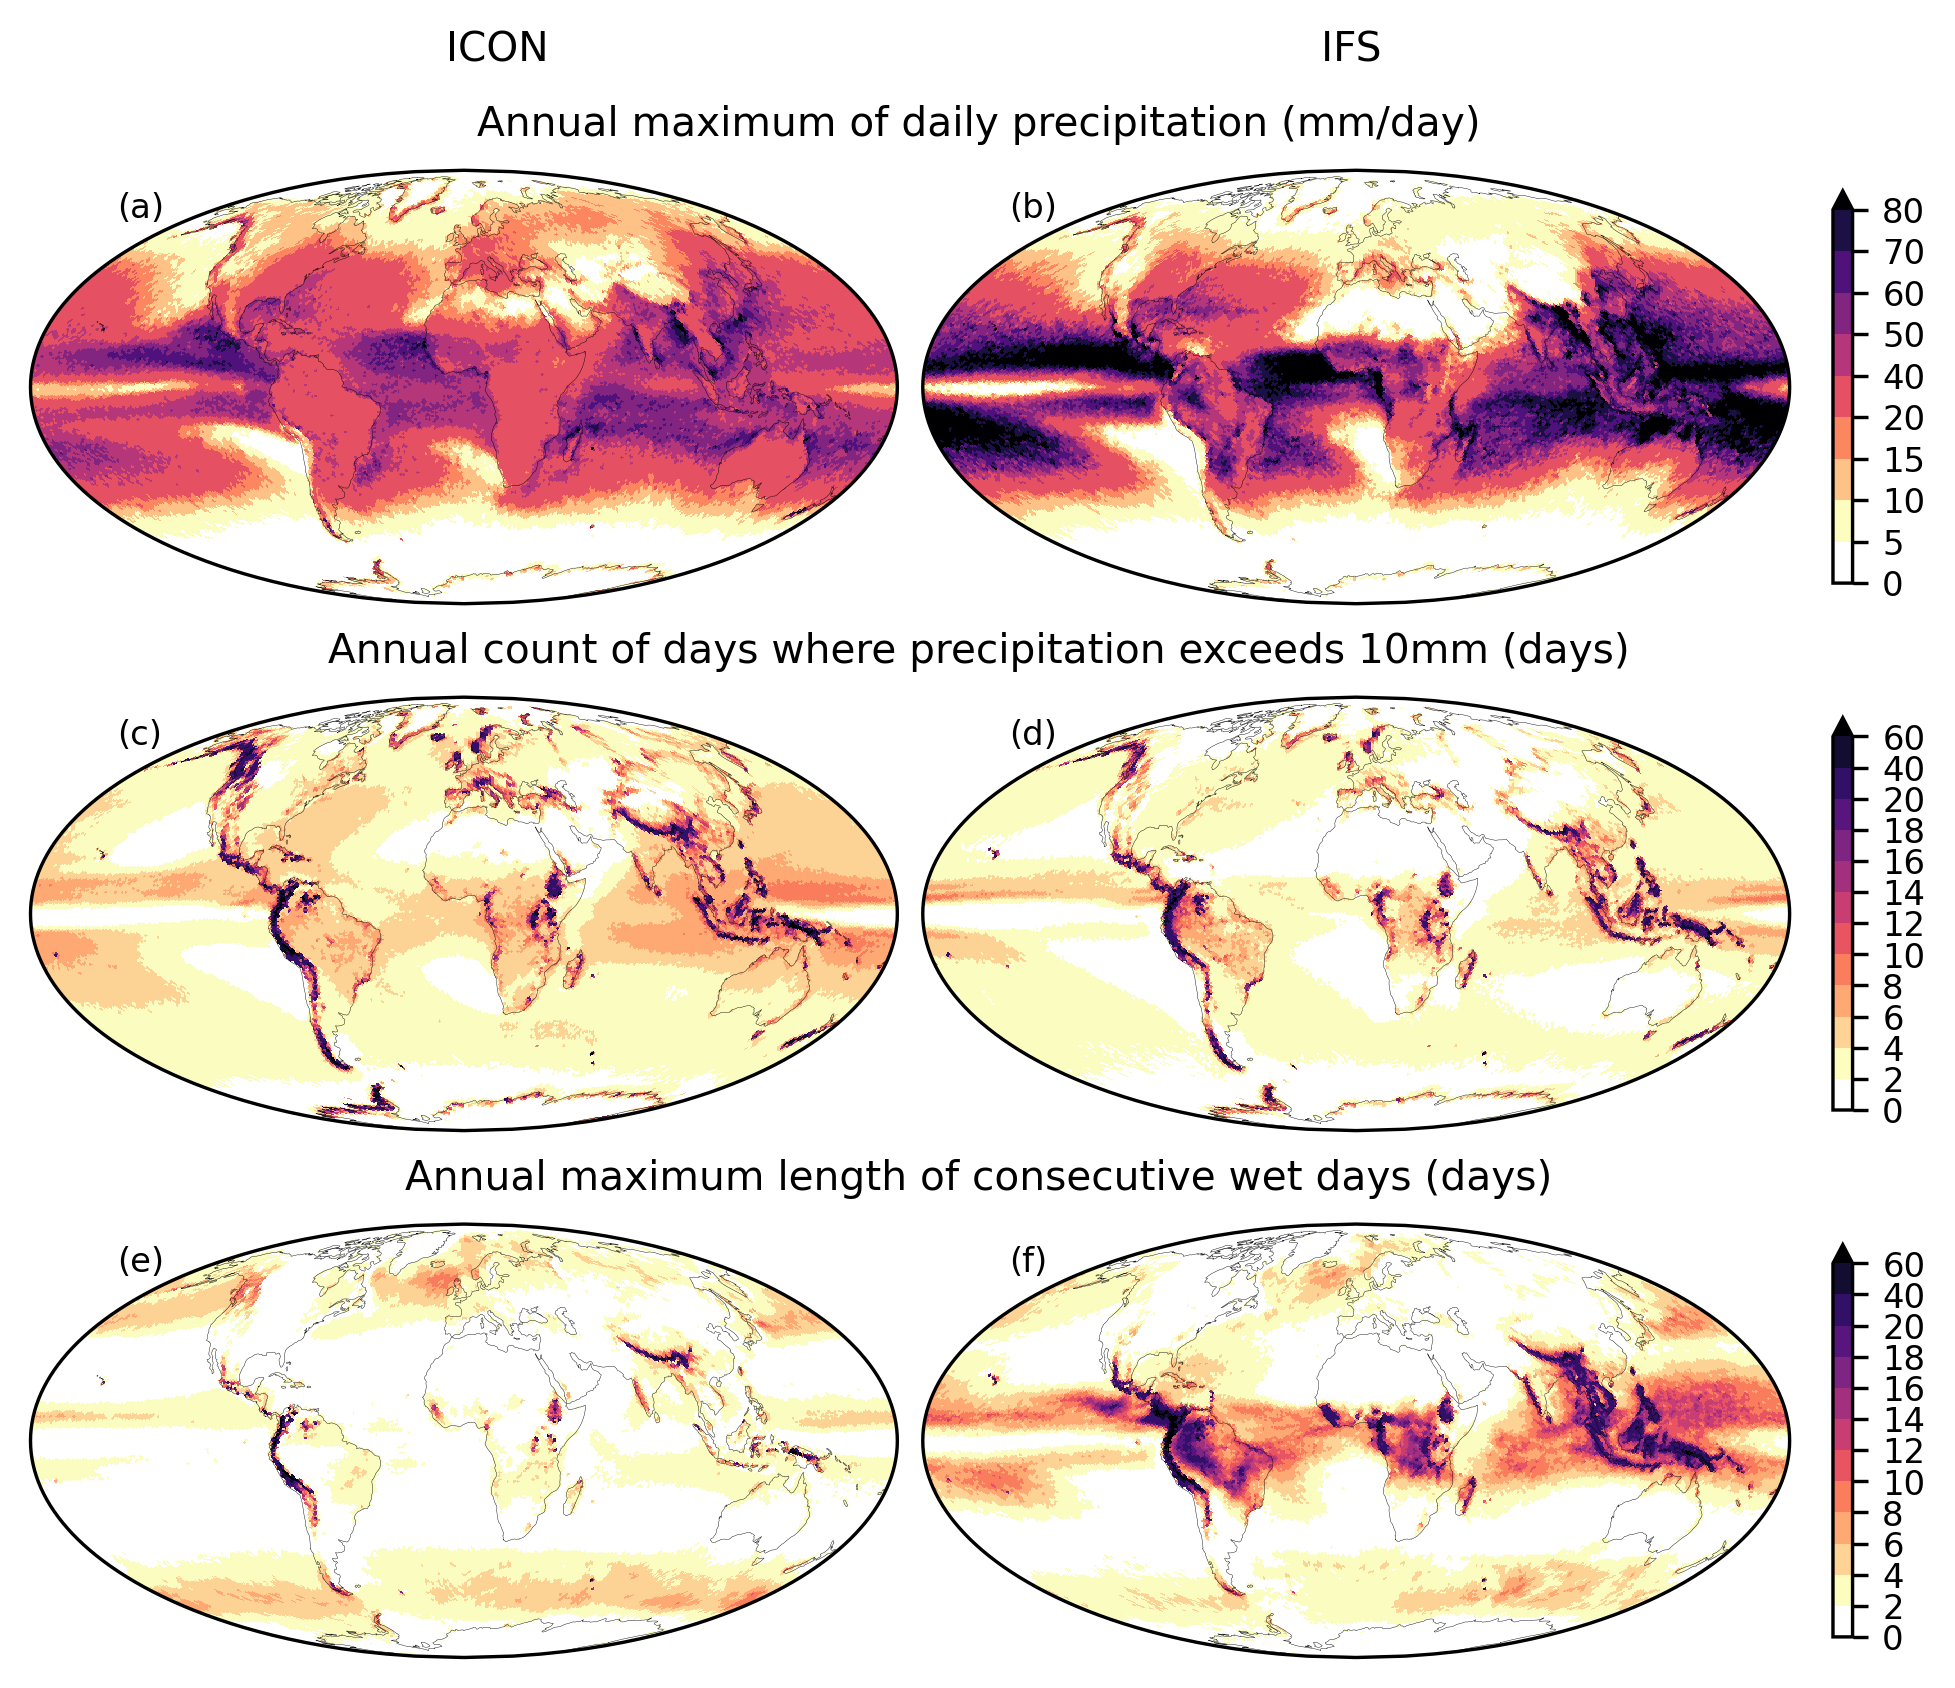

In [12]:
dpi = 305  # NOTE: depending on the exact resolutoin there sometimes is a an atrifact at the zero meridian

fig = plt.figure(constrained_layout=True, figsize=(16*cm, 14*cm), dpi=dpi)
fig.suptitle('ICON' + ' ' * 60 + 'IFS' + ' '*10 + '\n')

subfigs = fig.subfigures(nrows=3, ncols=1)

idx = 0
for index, subfig in zip(data_dict, subfigs):
    
    subfig.suptitle(title_dict[index], y=.97, va='bottom')
    
    axes = subfig.subplots(nrows=1, ncols=2, subplot_kw={'projection': proj})

    for model, ax in zip(data_dict[index], axes):
        ax.text(0.1, .95, label_dict[idx], ha='left', va='top', transform=ax.transAxes)
        ax.set_global()
        default_plot(data_dict[index][model], ax=ax, add_colorbar=False if idx % 2 == 0 else True, **kwargs_dict[index])
        idx += 1
        
fig.savefig(os.path.join(figpath, 'figure3.png'), dpi=dpi)
fig.savefig(os.path.join(figpath, 'figure3.pdf'), dpi=dpi)